# RECOMMENDATION SYSTEM PROJECT

### Netflix Movies and TV shows Recommendation

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [88]:
netflix=pd.read_csv('netflix_titles.csv')

In [89]:
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
netflix.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [5]:
netflix.shape

(8807, 12)

<AxesSubplot:>

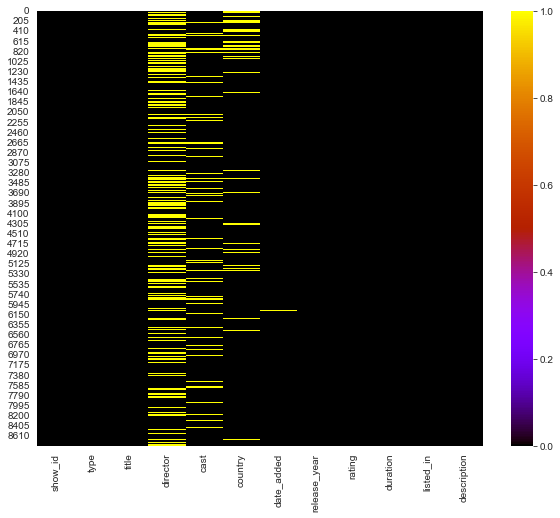

In [130]:
#missing values
plt.figure(figsize=(10,8))
sns.heatmap(netflix.isna(),cmap='gnuplot')

In [7]:
netflix['type'].unique()

array(['Movie', 'TV Show'], dtype=object)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='type', ylabel='count'>

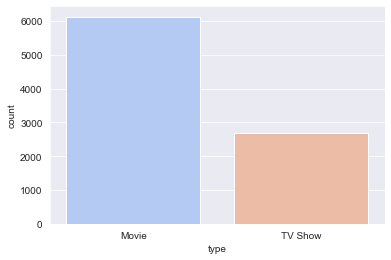

In [8]:
#types - Movie & TV Show
sns.set_style('darkgrid')
sns.countplot('type',data=netflix,palette='coolwarm')

In [9]:
netflix_shows=netflix[netflix['type']=='TV Show']
netflix_movies=netflix[netflix['type']=='Movie']

In [10]:
netflix_date = netflix_shows[['date_added']].dropna()
netflix_date['year'] = netflix_date['date_added'].apply(lambda x : x.split(',')[-1])
netflix_date['month'] = netflix_date['date_added'].apply(lambda x : x.split(' ')[0])

In [11]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'][::-1]

In [12]:
df = netflix_date.groupby('year')['month'].value_counts().unstack().fillna(0)[month_order]
df

month,December,November,October,September,August,July,June,May,April,March,February,January
year,,,,,,,,,,,,
2008,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2013,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2014,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2015,4.0,1.0,4.0,0.0,0.0,2.0,1.0,0.0,4.0,1.0,0.0,0.0
2016,43.0,16.0,19.0,17.0,11.0,9.0,7.0,2.0,7.0,2.0,6.0,26.0
2017,35.0,27.0,28.0,32.0,33.0,30.0,27.0,22.0,25.0,36.0,16.0,14.0
2018,56.0,36.0,44.0,42.0,33.0,25.0,27.0,25.0,27.0,32.0,23.0,18.0
2019,44.0,66.0,63.0,36.0,44.0,57.0,46.0,48.0,42.0,52.0,42.0,35.0
2020,68.0,51.0,51.0,53.0,47.0,43.0,41.0,52.0,50.0,44.0,42.0,52.0


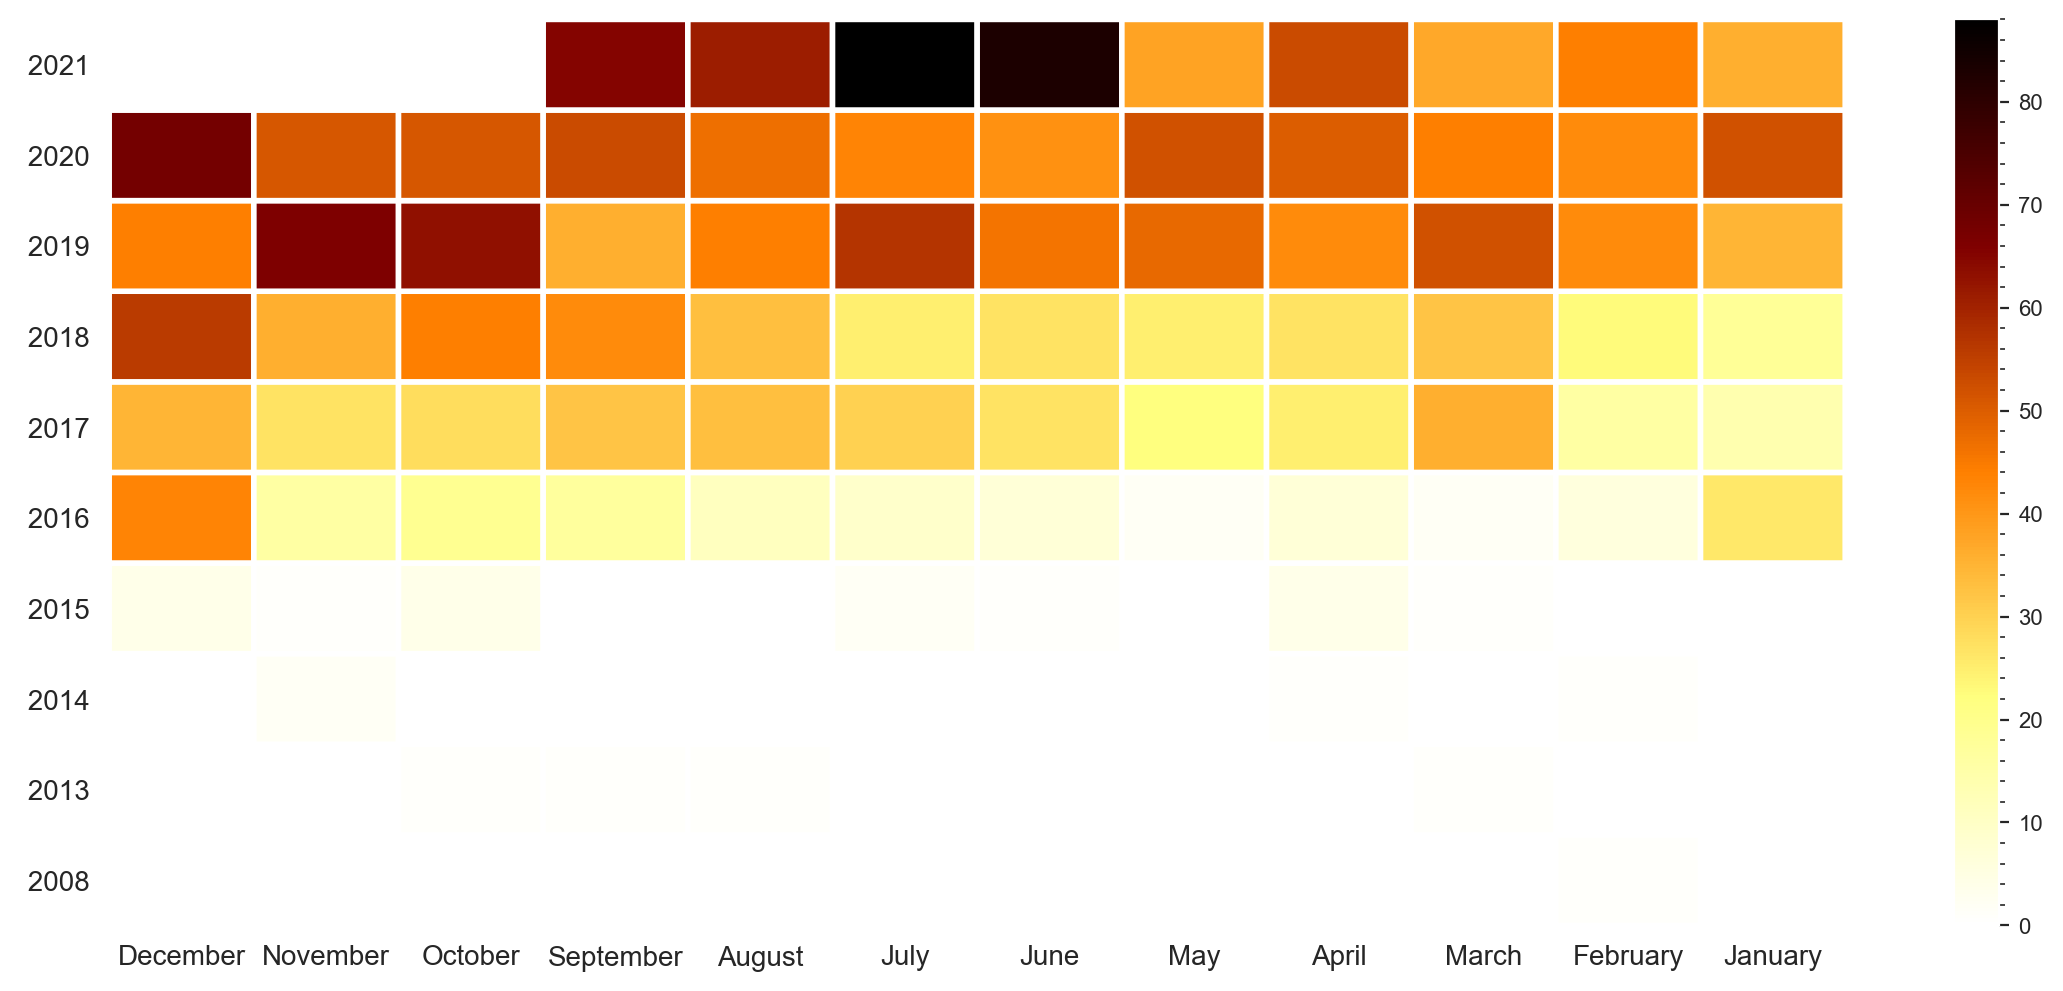

In [13]:
plt.figure(figsize=(14, 6), dpi=200)
plt.pcolor(df, cmap='afmhot_r', edgecolors='white', linewidths=2) # heatmap
plt.xticks(np.arange(0.5, len(df.columns), 1), df.columns)
plt.yticks( np.arange(0.5, len(df.index), 1),df.index)
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=8) 
cbar.ax.minorticks_on()
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='rating', ylabel='count'>

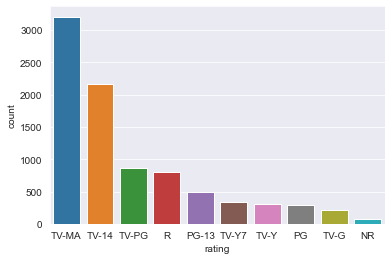

In [14]:
#netflix ratings
sns.countplot('rating',data=netflix,order=netflix['rating'].value_counts().index[0:10])

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='release_year', ylabel='count'>

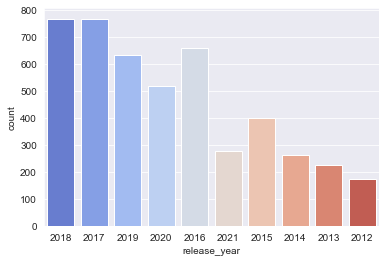

In [15]:
#movie release years
sns.countplot('release_year',data=netflix_movies,order=netflix['release_year'].value_counts().index[0:10],palette='coolwarm')

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='release_year', ylabel='count'>

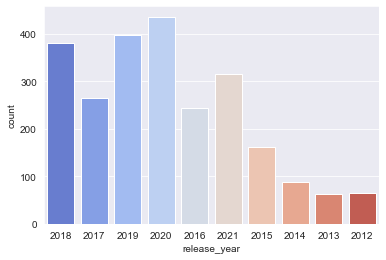

In [16]:
#TV Shows release years
sns.countplot('release_year',data=netflix_shows,order=netflix['release_year'].value_counts().index[0:10],palette='coolwarm')

In [17]:
order_m=netflix[netflix['type']=='Movie']['country'].value_counts().sort_values(ascending=False).index[0:10]

<AxesSubplot:xlabel='country', ylabel='count'>

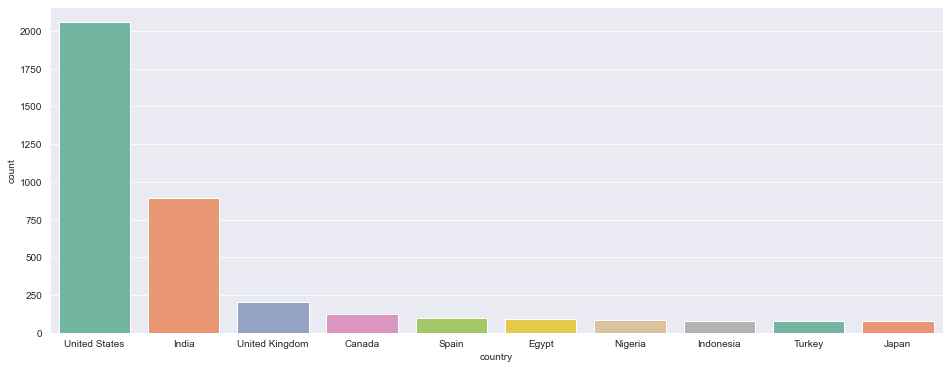

In [18]:
# Netflix movies country wise
plt.figure(figsize=(16,6))
sns.countplot(x='country',data=netflix_movies,order=order_m,palette='Set2')

<AxesSubplot:xlabel='country', ylabel='count'>

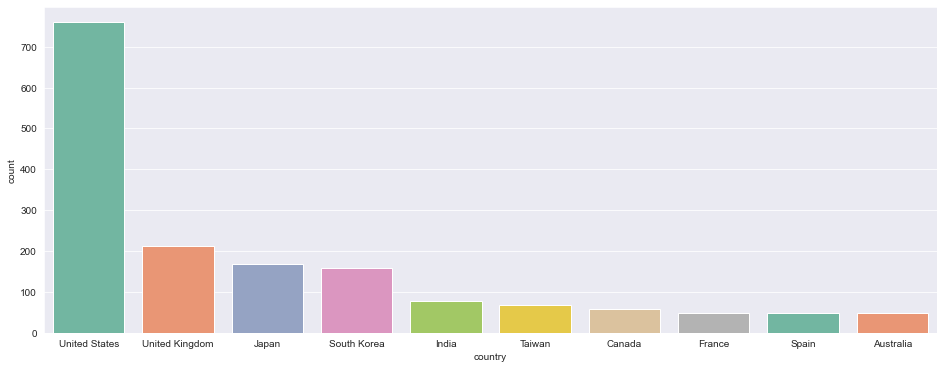

In [19]:
#TV Shows country wise
order_s=netflix[netflix['type']=='TV Show']['country'].value_counts().sort_values(ascending=False).index[0:10]
plt.figure(figsize=(16,6))
sns.countplot(x='country',data=netflix_shows,order=order_s,palette='Set2')

<AxesSubplot:xlabel='duration', ylabel='Density'>

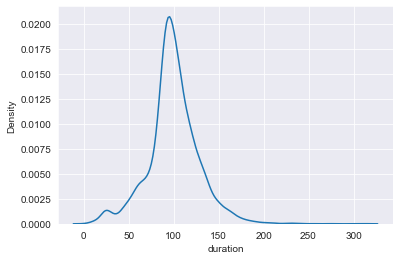

In [20]:
#Netflix movies duration
movies_duration=netflix_movies[['duration']].dropna()
movies_duration.head()
movies_duration['duration']=movies_duration['duration'].apply(lambda x : x.split(' ')[0])
movies_duration['duration']=movies_duration['duration'].astype('int')
sns.kdeplot(data=movies_duration['duration'])

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='duration', ylabel='count'>

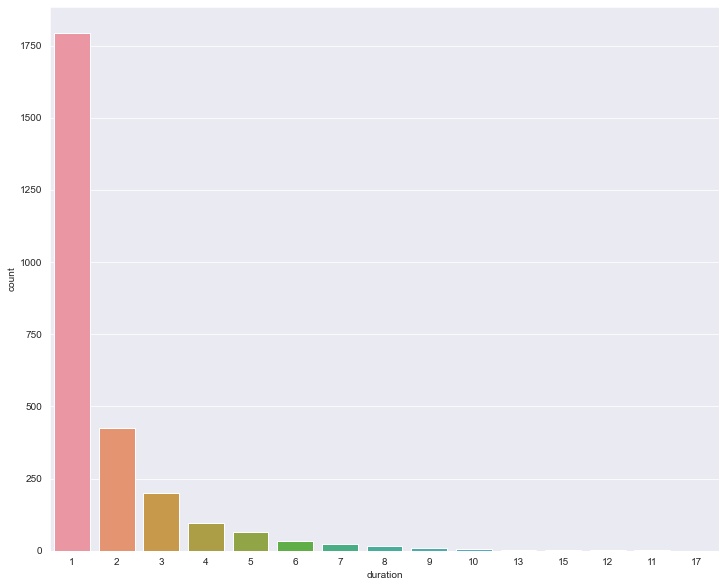

In [21]:
#TV shows no. of seasons
plt.figure(figsize=(12,10))
shows_duration=netflix_shows[['duration']].dropna()
shows_duration['duration']=shows_duration['duration'].apply(lambda x : x.split(' ')[0])
shows_duration['duration']=shows_duration['duration'].astype('int')
sns.countplot(shows_duration['duration'],order=shows_duration['duration'].value_counts().index[0:15])

In [22]:
netflix_shows.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...


In [23]:
top=netflix_shows[['title','duration']]

In [24]:
top.dropna()

,title,duration
1,Blood & Water,2 Seasons
2,Ganglands,1 Season
3,Jailbirds New Orleans,1 Season
4,Kota Factory,2 Seasons
5,Midnight Mass,1 Season
...,...,...
8795,Yu-Gi-Oh! Arc-V,2 Seasons
8796,Yunus Emre,2 Seasons
8797,Zak Storm,3 Seasons
8800,Zindagi Gulzar Hai,1 Season


In [25]:
top['duration']=top['duration'].apply(lambda x:x.split(' ')[0])

C:\Users\HP\AppData\Local\Temp/ipykernel_11940/3901513265.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top['duration']=top['duration'].apply(lambda x:x.split(' ')[0])


In [26]:
top['duration']=top['duration'].astype('int')

C:\Users\HP\AppData\Local\Temp/ipykernel_11940/2121991973.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top['duration']=top['duration'].astype('int')


In [27]:
top=top.sort_values('duration',ascending=False)

In [28]:
top10=top[0:10]

<AxesSubplot:ylabel='title'>

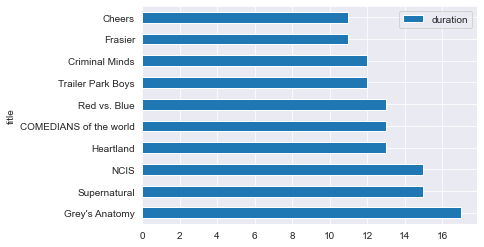

In [29]:
#Netflix shows with max no. of seasons
top10.plot(kind='barh',x='title',y='duration')

In [30]:
#US oldest series
us_series_data=netflix_shows[netflix_shows['country']=='United States'][['release_year','title']]
oldest_us_series=us_series_data.sort_values(by='release_year')[0:10]
oldest_us_series

,release_year,title
1331,1945,Five Came Back: The Reference Films
7743,1946,Pioneers of African-American Cinema
8541,1963,The Twilight Zone (Original Series)
8189,1967,The Andy Griffith Show
6970,1988,Highway to Heaven
5299,1988,High Risk
8644,1990,Twin Peaks
7721,1990,Pee-wee's Playhouse
7175,1990,Ken Burns: The Civil War
6456,1992,Cheers


In [31]:
# US newest us series
newest_us_series=us_series_data.sort_values(by='release_year',ascending=False)[0:10]
newest_us_series

,release_year,title
15,2021,Dear White People
900,2021,"Money, Explained"
1231,2021,City of Ghosts
1213,2021,Paradise PD
1200,2021,Waffles + Mochi
1181,2021,Country Comfort
1168,2021,DOTA: Dragon's Blood
1143,2021,Worn Stories
1127,2021,Prank Encounters
1057,2021,Dad Stop Embarrassing Me!


### RECOMMENDATION SYSTEM

In [90]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [91]:
#removing stopwords
tfidf = TfidfVectorizer(stop_words='english')

In [92]:
#Replace NaN with an empty string
netflix['description'] = netflix['description'].fillna('')

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(netflix['description'])

#Output the shape of tfidf_matrix
tfidf_matrix.shape

(8807, 18895)

In [93]:
# Import linear_kernel
from sklearn.metrics.pairwise import linear_kernel

# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [103]:
cosine_sim

array([[1.        , 0.        , 0.        , ..., 0.        , 0.01538292,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.02230089],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.01538292, 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.02230089, ..., 0.        , 0.        ,
        1.        ]])

In [97]:
indices = pd.Series(netflix.index, index=netflix['title'])

In [102]:
indices['Blood & Water']

1

In [116]:
def get_recommendations(title, cosine_sim=cosine_sim):
    idx = indices[title]#fetching the index number of the title

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    #print(sim_scores)
    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]
    
    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]#0 because fetching the index number of the most similar movies 
    #print(movie_indices)
    # Return the top 10 most similar movies
    return netflix['title'].iloc[movie_indices]

In [117]:
get_recommendations('Peaky Blinders')

7683                    Our Godfather
2646                   My Stupid Boss
3133                              Don
8293                         The Fear
7140    Jonathan Strange & Mr Norrell
7785                Power Rangers Zeo
8467                       The Prison
8539                       The Tudors
1510                    The Con Is On
8391     The Legend of Michael Mishra
Name: title, dtype: object

### Content based filtering on multiple metrics

In [118]:
#Filling null values with empty string.
filledna=netflix.fillna('')
filledna.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


In [120]:
#Cleaning the data - making all the words lower case
def clean_data(x):
        return str.lower(x.replace(" ", ""))

In [121]:
#Identifying features on which the model is to be filtered.
features=['title','director','cast','listed_in','description']
filledna=filledna[features]

In [122]:
for feature in features:
    filledna[feature] = filledna[feature].apply(clean_data)
    
filledna.head(2)

,title,director,cast,listed_in,description
0,dickjohnsonisdead,kirstenjohnson,,documentaries,"asherfathernearstheendofhislife,filmmakerkirst..."
1,blood&water,,"amaqamata,khosingema,gailmabalane,thabangmolab...","internationaltvshows,tvdramas,tvmysteries","aftercrossingpathsataparty,acapetownteensetsou..."


In [123]:
#Creating a "soup" or a "bag of words" for all rows.
def create_soup(x):
    return x['title']+ ' ' + x['director'] + ' ' + x['cast'] + ' ' +x['listed_in']+' '+ x['description']

In [125]:
filledna['soup'] = filledna.apply(create_soup, axis=1)
filledna.head(2)

,title,director,cast,listed_in,description,soup
0,dickjohnsonisdead,kirstenjohnson,,documentaries,"asherfathernearstheendofhislife,filmmakerkirst...",dickjohnsonisdead kirstenjohnson documentarie...
1,blood&water,,"amaqamata,khosingema,gailmabalane,thabangmolab...","internationaltvshows,tvdramas,tvmysteries","aftercrossingpathsataparty,acapetownteensetsou...","blood&water amaqamata,khosingema,gailmabalane..."


In [126]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

tfidf = TfidfVectorizer(stop_words='english')
count_matrix = tfidf.fit_transform(filledna['soup'])

cosine_sim2 = cosine_similarity(count_matrix, count_matrix)

In [127]:
filledna=filledna.reset_index()
indices = pd.Series(filledna.index, index=filledna['title'])

In [128]:
def get_recommendations_new(title, cosine_sim=cosine_sim):
    title=title.replace(' ','').lower()
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return netflix['title'].iloc[movie_indices]

In [129]:
get_recommendations_new('PK', cosine_sim2)

1114                        3 Idiots
4507                           Sanju
3334                           Drive
1022                Taare Zameen Par
4427                 Chance Pe Dance
4445                     Kai Po Che!
8391    The Legend of Michael Mishra
4790               Anthony Kaun Hai?
2268                            Boss
3915                  Mumbai Matinee
Name: title, dtype: object